# Hyperparameters and Model Validation

# A. Model Validation:

* Model Validation 
    * After choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the predictions to the known values.

### A.1. Model Validation: The Wrong Way:

* Training and evaluating the model on the same data.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

accuracy_score(y, y_model)

1.0

### A.2. Model Validation: The Right Way: Holdout Sets

* Holdout set:
    * hold back some subset of the data from the training of the model, and then use this holdout set to check the model's performance.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

In [4]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9777777777777777

### A.3. Model Validation via Cross-Validation:

* One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training.
    * Cross-validation :
        * Do sequence of fits where each subset of data is used both as training set and as a validation set.

        * 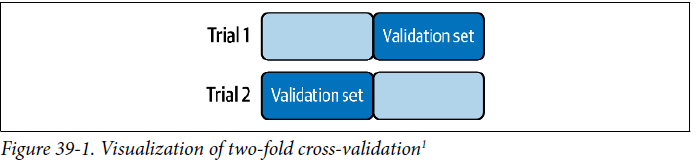
        * 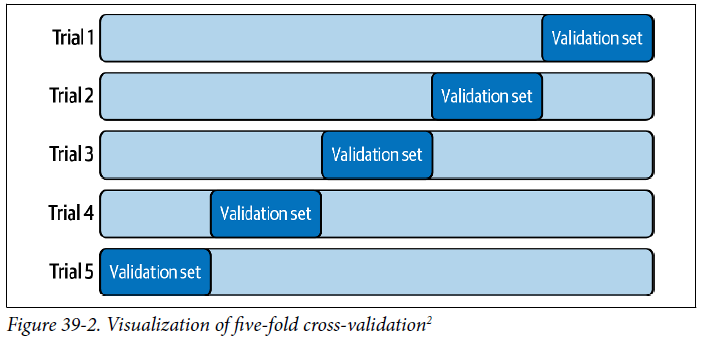

    * Leave-one-out cross validation:
        * Number of folds is equal to the number of data points.
        * We train on all points but one in each trial.

In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [6]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores.shape

(150,)

In [7]:
scores.mean()

0.96

# B. Selecting the Best Model

* If our estimator is underperforming, how should we move forward?
    * Use a more complicated/more flexible model.
    * Use a less complicated/less flexible model.
    * Gather more training samples.
    * Gather more data to add features to each sample.

### B.1. The Bias-Variance Trade-off

* Fundamentally, finding “the best model” is about finding a sweet spot in the trade-off between bias and variance.
